In [20]:
import nglview
import rna_pdb_tools.Seq as Seq
import rna_pdb_tools.BlastPDB
from rna_pdb_tools.BlastPDB import BlastPDB
reload(rna_pdb_tools.BlastPDB);
reload(Seq);

In [21]:
seq = Seq.RNASequence("CCGGACGAGGGGCGCCGUACCCGGUCAGCGACAAGACGGCGC")

In [22]:
seq

CCGGACGAGGGGCGCCGUACCCGGUCAGCGACAAGACGGCGC

# Secondary structure prediction

In [31]:
print seq.predict_ss()

None


In [32]:
print seq.predict_ss(method='RNAsubopt')

None


In [33]:
print seq.predict_ss(method='ipknot')

CalledProcessError: Command 'ipknot /var/folders/yc/ssr9692s5fzf7k165grnhpk80000gp/T/tmpbv_wLi.fa' returned non-zero exit status -4

In [34]:
print seq.predict_ss(method='centroid_fold')

CalledProcessError: Command 'centroid_fold /var/folders/yc/ssr9692s5fzf7k165grnhpk80000gp/T/tmpTVQqsa.fa' returned non-zero exit status -4

In [35]:
print seq.predict_ss(method='contextfold')

((......)).(((((((.................)))))))




In [28]:
# load an alignment
%load_ext autoreload
%autoreload 2
import rna_pdb_tools.utils.rna_alignment.rna_alignment as ra
a = ra.RNAalignment('/Users/magnus/Dropbox/RNA_Puzzles21/Alignment/RF01763.stockholm.txt')
a

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


SingleLetterAlphabet() alignment with 39 rows and 89 columns
GACGAGCCCG----GUGCG--------CGGGC--UCCCGGACGA...GA- AP006618.1/133448-133513
AAAGGGC-------CAAAG-----------GC--GCCCGGACGA...AAG CP000910.1/2096309-2096249
ACAGGCGUCG----CGUGUUC------CGGCG--CCCCGGACGA...GAU CP000511.1/851388-851320
GAUGGGCGC-----CCAUCC--------GCGC--UCCCGGACGA...AG- AM849034.1/2863085-2863022
CGCGCCCCCGCU--UUGCUAC----GGUGGGG-ACACCCGACGA...ACC ABJH01000172.1/10128-10201
CGUGAGG-------GUGU------------CU-GGCCCGGACGA...GAC CP000113.1/4374426-4374485
GUCGGGCGC-----CCUCCC--------GCGC--UCCCGGACGA...AG- AM711867.1/3063871-3063808
GCGGCGCUC-----CUUCAGACA-----GAGC-GUCCCGGACGA...AGC AM746676.1/8188359-8188291
AAAUCGUCG-----ACA-----------CGAC--AUCCGGACGA...CC- AP011115.1/5208127-5208067
GCCAUGUCA-----CCAGU---------UGAC---ACCGGACGA...UUU CP000580.1/1319367-1319304
GAUAUGCUAU----AAA----------AUAAU--CUCCGGACGA...CUU CR628336.1/661276-661213
GCAGGCGCCG----UCGAUC-------CGGCG--CCCCGGACGA...GUU CP000656.1/85042-85109
AGGCUUUCC----

Rchie: plot saved to rchie.png


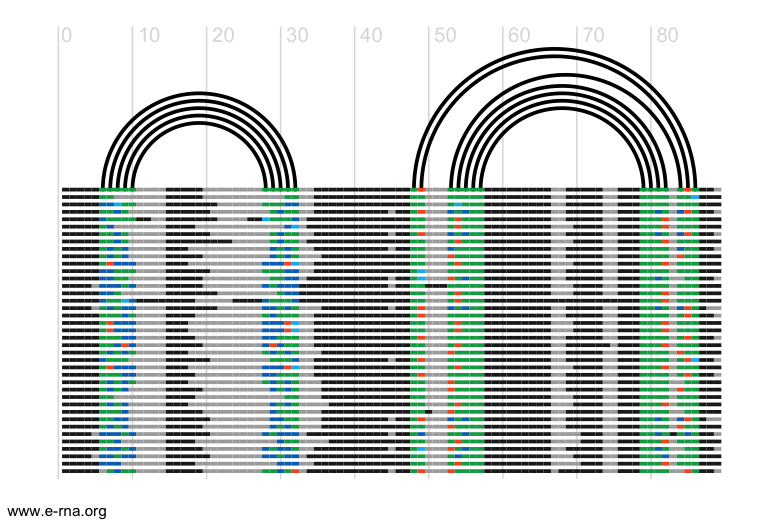

In [29]:
#print a.io.format("fasta")
ra.RChie().plot_cov(a.io.format("fasta"), a.ss_cons_std, verbose=False)

In [12]:
import rna_pdb_tools.RfamSearch as rf
seq = Seq.RNASequence("CCGGACGAGGGGCGCCGUACCCGGUCAGCGACAAGACGGCGC")
rs = rf.RfamSearch()
print rs.cmscan(seq)

# cmscan :: search sequence(s) against a CM database
# INFERNAL 1.1.2 (July 2016)
# Copyright (C) 2016 Howard Hughes Medical Institute.
# Freely distributed under a BSD open source license.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# query sequence file:                   /var/folders/yc/ssr9692s5fzf7k165grnhpk80000gp/T/tmpUbTC2W.fa
# target CM database:                    /home/magnus/work/db/rfamdb/Rfam.cm
# sequence reporting threshold:          E-value <= 1
# number of worker threads:              4
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

Query:       target  [L=42]
Hit scores:
 rank     E-value  score  bias  modelname  start    end   mdl trunc   gc  description
 ----   --------- ------ -----  --------- ------ ------   --- ----- ----  -----------
  (1) !   1.6e-11   55.5   0.1  ykkC-III       1     42 +  cm    no 0.76  -


Hit alignments:
>> ykkC-III  
 rank     E-value  score  bias mdl mdl from   mdl to       seq f

# PDB Blast search

In [13]:
p = BlastPDB(seq.seq)
p.search()
print p.result

<HTML>
<TITLE>BLAST Search Results</TITLE>
<BODY BGCOLOR="#FFFFFF" LINK="#0000FF" VLINK="#660099" ALINK="#660099">
<PRE>
<b>BLASTN 2.2.18 [Mar-02-2008]</b>


<b><a href="http://www.ncbi.nlm.nih.gov/entrez/query.fcgi?db=PubMed&cmd=Retrieve&list_uids
=9254694&dopt=Citation">Reference</a>:</b>
Altschul, Stephen F., Thomas L. Madden, Alejandro A. Sch&auml;ffer, 
Jinghui Zhang, Zheng Zhang, Webb Miller, and David J. Lipman (1997), 
"Gapped BLAST and PSI-BLAST: a new generation of protein database search
programs",  Nucleic Acids Res. 25:3389-3402.

<b>Query=</b> UNKNOWN_SEQUENCE
         (42 letters)

<b>Database:</b> pdb_nucleotide 
           15,339 sequences; 2,579,352 total letters

Searching..................................................done

<PRE>


                                                                 Score    E
Sequences producing significant alignments:                      (bits) Value

1M5L:1:A|pdbid|entity|chain(s)|sequence                               <a href = #

# 3D structure analysis

In [12]:
from rna_pdb_tools.pdb_parser_lib import RNAStructure

fn = "rna_pdb_tools/data/260c8ff6-f24e-4eff-9760-1831407fc770_ALL_thrs5.30A_clust01-000001_AA.pdb"

s = RNAStructure(fn)
print s.get_report()
print s.get_info_chains()
print s.get_head()
#print s.view() # image paste here :-)

The RNARNAStructure report: rna_pdb_tools/data/260c8ff6-f24e-4eff-9760-1831407fc770_ALL_thrs5.30A_clust01-000001_AA.pdb 
A:1-43 B:1-10
ATOM      1  P     G A   1     -12.509  18.639  13.726  1.00  0.00
ATOM      2  OP1   G A   1     -13.934  18.507  14.168  1.00  0.00
ATOM      3  OP2   G A   1     -11.541  17.557  14.097  1.00  0.00
ATOM      4  O5'   G A   1     -12.604  18.683  12.146  1.00  0.00
ATOM      5  C5'   G A   1     -13.512  19.569  11.525  1.00  0.00


In [13]:
%%bash
cd rna_pdb_tools
./rna-pdb-tools.py --no_hr --get_seq data/260c8ff6-f24e-4eff-9760-1831407fc770_ALL_thrs5.30A_clust01-000001_AA.pdb

bash: line 2: ./rna-pdb-tools.py: No such file or directory


# RNA 3D structure prediction

In [14]:
# model using SimRNA
#res = SimRNA(ss,seq.get_ss())

In [15]:
# fake import, should be 
res = "rna_pdb_tools/data/260c8ff6-f24e-4eff-9760-1831407fc770_ALL_thrs5.30A_clust01-000001_AA.pdb"
# view
view = nglview.show_structure_file(res)
view.add_representation(repr_type='cartoon')
view

# rna_pdb_tools --get_seq

In [16]:
%%bash
cd rna_pdb_tools
./rna-pdb-tools.py --no_hr --get_seq input/5k7c.pdb

bash: line 2: ./rna-pdb-tools.py: No such file or directory


In [17]:
%%bash
cd rna_pdb_tools
./rna-pdb-tools.py --no_hr --get_seq input/5k7c.pdb
./rna-pdb-tools.py --no_hr --get_seq input/tetraloop.pdb
./rna-pdb-tools.py --get_seq input/1xjr.pdb

bash: line 2: ./rna-pdb-tools.py: No such file or directory
bash: line 3: ./rna-pdb-tools.py: No such file or directory
bash: line 4: ./rna-pdb-tools.py: No such file or directory
